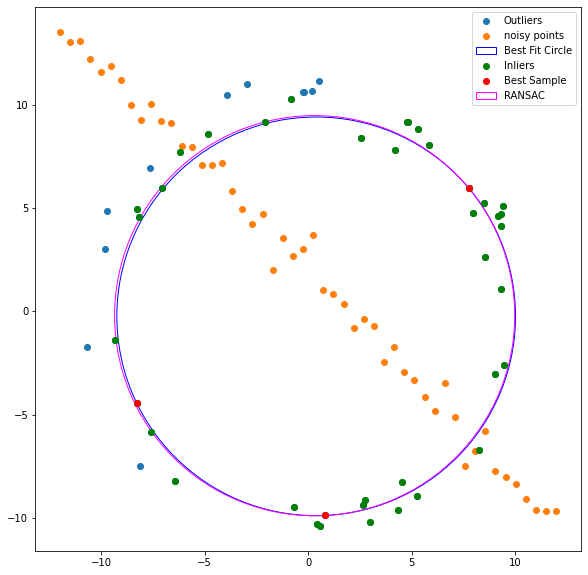

In [35]:
#Noisy points(given code)
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
#RANSAC function
def RANSAC(X_circ,ThresholdDistance,OutlierRatio,probability,s,MaxIterations):
    bestModelX = 0
    bestModelY = 0
    bestModelR = 0
    numOfInliers = 0
    samplePoint1,samplePoint2,samplePoint3 = [0,0],[0,0],[0,0]
    inliersX = []
    inliersY = []
    cenX = []
    cenY = []
    for i in range(MaxIterations):
        randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
        while randInt1==randInt2 or randInt2==randInt3 or randInt3==randInt1:
            randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
  
        x1,y1 = X_circ[randInt1,0],X_circ[randInt1,1]
        x2,y2 = X_circ[randInt2,0],X_circ[randInt2,1]
        x3,y3 = X_circ[randInt3,0],X_circ[randInt3,1]
        f = ((x1**2-x2**2+y1**2-y2**2)*(x1-x3)-(x1**2-x3**2+y1**2-y3**2)*(x1-x2))/(2*((y1-y3)*(x1-x2)-(y1-y2)*(x1-x3)))
        g = ((x1**2-x2**2+y1**2-y2**2)*(y1-y3)-(x1**2-x3**2+y1**2-y3**2)*(y1-y2))/(2*((y1-y2)*(x1-x3)-(y1-y3)*(x1-x2)))
        c = -(x1**2+y1**2+2*g*x1+2*f*y1)
        centerX = -g
        centerY = -f
        radius = (g**2+f**2-c)**(0.5)
        count = 0
        in_x = []
        in_y = []
        for j in range(len(X_circ[:,0])):
            distance_1 = abs(((X_circ[j,0]-centerX)**2+(X_circ[j,1]-centerY)**2)**(0.5)-radius)
            if distance_1<= ThresholdDistance:
                in_x.append(X_circ[j,0])
                in_y.append(X_circ[j,1])
                count+= 1
        
        if count > numOfInliers:
            bestModelX = centerX
            bestModelY = centerY
            bestModelR = radius
            numOfInliers = count
            samplePoint1[0] = x1
            samplePoint1[1] = y1
            samplePoint2[0] = x2
            samplePoint2[1] = y2
            samplePoint3[0] = x3
            samplePoint3[1] = y3
            inliersX = in_x
            inliersY = in_y
        if count/len(X_circ[:,0]) >= 1-OutlierRatio:
            cenX.append(centerX)
            cenY.append(centerY)
    return bestModelX,bestModelY,bestModelR,inliersX,inliersY,cenX,cenY,samplePoint1,samplePoint2,samplePoint3
N = 100
half_n = N // 2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
figure, axes = plt.subplots(figsize = (10,10))
axes.plot(X_circ[:,0],X_circ[:,1],'o',label = 'Outliers')
axes.plot(X_line[:,0],X_line[:,1],'o',label = 'noisy points')
#////////////////////////
#Best Fit circle
#///////////////////////
ThresholdDistance = 1
OutlierRatio = 0.4
probability = 0.99
s = 3
MaxIterations = int(np.log(1-probability)/np.log(1-(1-OutlierRatio)**s))

bestModelX,bestModelY,bestModelR,inliersX,inliersY,cenX,cenY,samplePoint1,samplePoint2,samplePoint3 = RANSAC(X_circ,ThresholdDistance,OutlierRatio,probability,s,MaxIterations)

circle = plt.Circle((bestModelX,bestModelY),bestModelR,fill = False,color = 'blue',label = 'Best Fit Circle')  
axes.set_aspect( 1 )
axes.add_artist( circle )
axes.plot(inliersX,inliersY,'o',color='green',label = 'Inliers')
axes.plot(np.array([samplePoint1[0],samplePoint2[0],samplePoint3[0]]), np.array([samplePoint1[1],samplePoint2[1],samplePoint3[1]]), 'o',color='red',label = 'Best Sample')

#//////////////////////////////////
#RANSAC Circle
#/////////////////////////////////

inliersX = np.array(inliersX).reshape(len(inliersX),1)
inliersY = np.array(inliersY).reshape(len(inliersY),1)
X_Circ_ = np.concatenate((inliersX, inliersY), axis=1)
bestModelX_,bestModelY_,bestModelR_,inliersX_,inliersY_,cenX_,cenY_,samplePoint1_,samplePoint2_,samplePoint3_ = RANSAC(X_Circ_,ThresholdDistance,OutlierRatio,probability,s,MaxIterations)
circle_ = plt.Circle((bestModelX_,bestModelY_),bestModelR_,fill = False,color = 'magenta',label = 'RANSAC')  
axes.set_aspect( 1 )
axes.add_artist(circle_)
plt.legend()
plt.show()
###https://sdg002.github.io/ransac-circle/index.html

In [30]:
#Ransac circle
ThresholdDistance = 5
OutlierRatio = 0.2
probability = 0.99
s = 3
MaxIterations = int(np.log(1-probability)/np.log(1-(1-OutlierRatio)**s))
bestModelX = 0
bestModelY = 0
bestModelR = 0
numOfInliers = 0
for i in range(MaxIterations):
    randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
    while randInt1==randInt2 or randInt2==randInt3 or randInt3==randInt1:
        randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
    x1,y1 = X_circ[randInt1,0],X_circ[randInt1,1]
    x2,y2 = X_circ[randInt2,0],X_circ[randInt2,1]
    x3,y3 = X_circ[randInt3,0],X_circ[randInt3,1]
    f = ((x1**2-x2**2+y1**2-y2**2)*(x1-x3)-(x1**2-x3**2+y1**2-y3**2)*(x1-x2))/(2*((y1-y3)*(x1-x2)-(y1-y2)*(x1-x3)))
    g = ((x1**2-x2**2+y1**2-y2**2)*(y1-y3)-(x1**2-x3**2+y1**2-y3**2)*(y1-y2))/(2*((y1-y2)*(x1-x3)-(y1-y3)*(x1-x2)))
    c = -(x1**2+y1**2+2*g*x1+2*f*y1)
    centerX = -g
    centerY = -f
    radius = (g**2+f**2-c)**(0.5)
    count = 0
    for j in range(len(X_circ[:,0])):
        distance_1 = abs(((X_circ[j,0]-centerX)**2+(X_circ[j,1]-centerY)**2)**(0.5)-radius)
        if distance_1<= ThresholdDistance:
            count+= 1
    
    if count > numOfInliers:
        bestModelX = centerX
        bestModelY = centerY
        bestModelR = radius

print(bestModelX,bestModelY,bestModelR)
circle=plt.Circle((bestModelX,bestModelY),bestModelR)   


-0.29513875081697283 -0.04705489547131923 9.695795269685998


56 60
129 75
131 123
51 127
[ 2.21433543e+11  2.67108423e+10  7.84955353e+06  1.33378609e+06
  1.26447855e+05  8.17193609e+04  6.11328549e+03  9.99997058e-01
 -2.17100578e-09]


Text(0.5, 1.0, 'Warped Image')

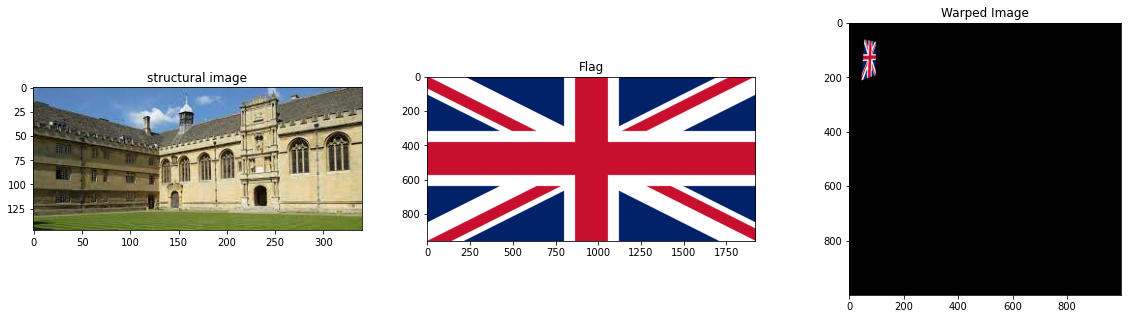

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
#Mouse clicking
def mousePoint(event, x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x,y)
        imgPoints.append([x,y,1])

img = cv.imread('clg.jpg')
cv.imshow("IMG",img)
imgPoints = []
cv.setMouseCallback("IMG",mousePoint)

cv.waitKey(0)
imgFlag = cv.imread('flag.png')

flagheight,flagWidth = imgFlag.shape[0],imgFlag.shape[1]
flagPoints = np.array([[0,0,1],[0,flagWidth,1],[flagheight,flagWidth,1],[flagheight,0,1]])
imgPoints = np.array(imgPoints)

A = np.array([[0,0,0,flagPoints[0][0],flagPoints[0][1],flagPoints[0][2],-imgPoints[0][1]*flagPoints[0][0],-imgPoints[0][1]*flagPoints[0][1],-imgPoints[0][1]*flagPoints[0][2]],
[flagPoints[0][0],flagPoints[0][1],flagPoints[0][2],0,0,0,-imgPoints[0][0]*flagPoints[0][0],-imgPoints[0][0]*flagPoints[0][1],-imgPoints[0][0]*flagPoints[0][2]],
[0,0,0,flagPoints[1][0],flagPoints[1][1],flagPoints[1][2],-imgPoints[1][1]*flagPoints[1][0],-imgPoints[1][1]*flagPoints[1][1],-imgPoints[1][1]*flagPoints[1][2]],
[flagPoints[1][0],flagPoints[1][1],flagPoints[1][2],0,0,0,-imgPoints[1][0]*flagPoints[1][0],-imgPoints[1][0]*flagPoints[1][1],-imgPoints[1][0]*flagPoints[1][2]],
[0,0,0,flagPoints[2][0],flagPoints[2][1],flagPoints[2][2],-imgPoints[2][1]*flagPoints[2][0],-imgPoints[2][1]*flagPoints[2][1],-imgPoints[2][1]*flagPoints[2][2]],
[flagPoints[2][0],flagPoints[2][1],flagPoints[2][2],0,0,0,-imgPoints[2][0]*flagPoints[2][0],-imgPoints[2][0]*flagPoints[2][1],-imgPoints[2][0]*flagPoints[2][2]],
[0,0,0,flagPoints[3][0],flagPoints[3][1],flagPoints[3][2],-imgPoints[3][1]*flagPoints[3][0],-imgPoints[3][1]*flagPoints[3][1],-imgPoints[3][1]*flagPoints[3][2]],
[flagPoints[3][0],flagPoints[3][1],flagPoints[3][2],0,0,0,-imgPoints[3][0]*flagPoints[3][0],-imgPoints[3][0]*flagPoints[3][1],-imgPoints[3][0]*flagPoints[3][2]],
],dtype=np.float64)

AAT = A.T @ A
w, v = np.linalg.eig(AAT)
print(w)
minIndex = np.where(w == np.min(w))[0][0]
H = v[:, np.argmin(w)]
H = H.reshape((3,3))
im1to4 = cv.warpPerspective(imgFlag,H,(1000,1000))  
fig,ax = plt.subplots(1,3,figsize = (20,5))
im1to4 = cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgFlag = cv.cvtColor(imgFlag, cv.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[0].set_title("structural image")
ax[1].imshow(imgFlag)
ax[1].set_title("Flag")
ax[2].imshow(im1to4)
ax[2].set_title("Warped Image")


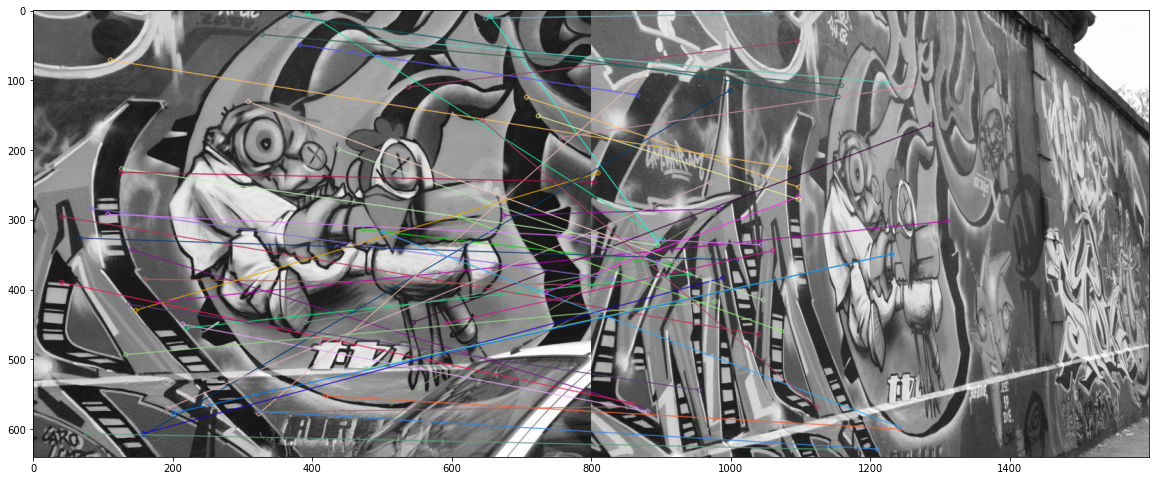

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img5.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
matched_img = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
fig,ax = plt.subplots(figsize = (20,20))
ax.imshow(matched_img)